In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('./train.csv/train.csv')
df.shape

(404290, 6)

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
new_df = df.sample(30000,random_state=2)

In [5]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
new_df.is_duplicate.value_counts()

is_duplicate
0    19013
1    10987
Name: count, dtype: int64

is_duplicate
0    19013
1    10987
Name: count, dtype: int64
is_duplicate
0    63.376667
1    36.623333
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

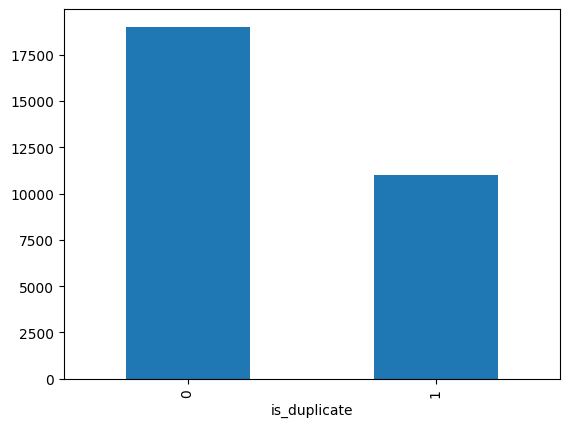

In [7]:
print(new_df["is_duplicate"].value_counts())
print(new_df["is_duplicate"].value_counts() / new_df["is_duplicate"].count() * 100)

new_df["is_duplicate"].value_counts().plot(kind="bar")

In [8]:
import pandas as pd
import numpy as np

qid = pd.Series(new_df["qid1"].tolist() + new_df["qid2"].tolist())
print("Number of unique questions:", np.unique(qid).shape[0])

x = qid.value_counts()
print("Number of questions that appear multiple times:", x[x > 1].shape[0])

print("Number of questions that appear once:", x[x == 1].shape[0])


Number of unique questions: 55299
Number of questions that appear multiple times: 3480
Number of questions that appear once: 51819


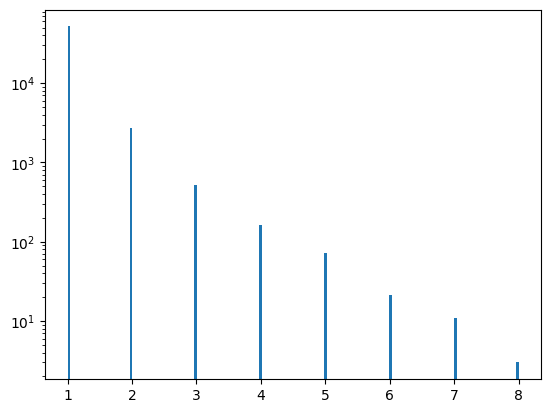

In [9]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()

added columns q1 len and q2 len

In [10]:
new_df["q1_len"] = new_df["question1"].str.len()
new_df["q2_len"] = new_df["question2"].str.len()

added columns q1 number of words and q2 number of words

In [12]:
new_df["q1_num_words"] = new_df["question1"].apply(lambda x: len(x.split(" ")))
new_df["q2_num_words"] = new_df["question2"].apply(lambda x: len(x.split(" ")))

In [13]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9


common words

In [ ]:
def common_words(row):
    w1 = set(row["question1"].lower().split())
    w2 = set(row["question2"].lower().split())
    return len(w1 & w2)

new_df["word_common"] = new_df.apply(common_words, axis=1)

In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3


total words

In [20]:
def total_words(row):
    w1 = set(row["question1"].lower().split())
    w2 = set(row["question2"].lower().split())
    return len(w1.union(w2))

new_df["total_words"] = new_df.apply(total_words, axis=1)

In [21]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,13
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,16
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,32
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,10


wordshare col

In [22]:
new_df["word_share"] = round(new_df["word_common"] / new_df["total_words"],2)
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,13,0.85
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,16,0.44
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,32,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,10,0.30


eda on data

minimum characters in q1 2
maximum characters in q1 391
minimum characters in q2 6
maximum characters in q2 1151
average characters in q1 59.7133
average characters in q2 60.29343333333333


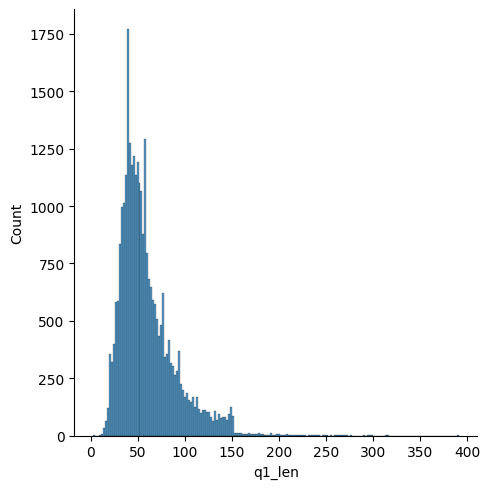

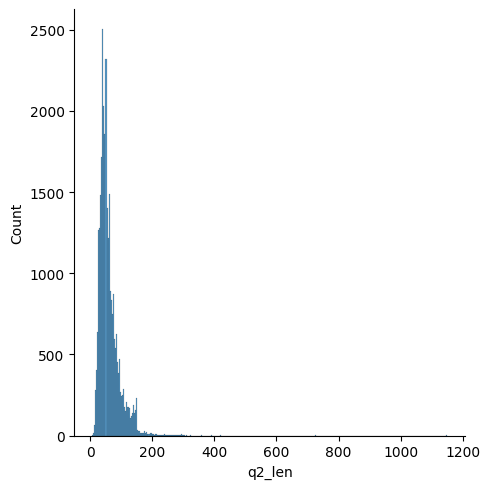

In [24]:
sns.displot(new_df["q1_len"])
sns.displot(new_df["q2_len"])
print("minimum characters in q1",new_df["q1_len"].min())
print("maximum characters in q1",new_df["q1_len"].max())
print("minimum characters in q2",new_df["q2_len"].min())
print("maximum characters in q2",new_df["q2_len"].max())
print("average characters in q1",new_df["q1_len"].mean())
print("average characters in q2",new_df["q2_len"].mean())

minimum words in q1: 1
minimum words in q2: 1
maximum words in q1: 72
maximum words in q2: 237
average words in q1: 10.969133333333334
average words in q2: 11.232133333333334


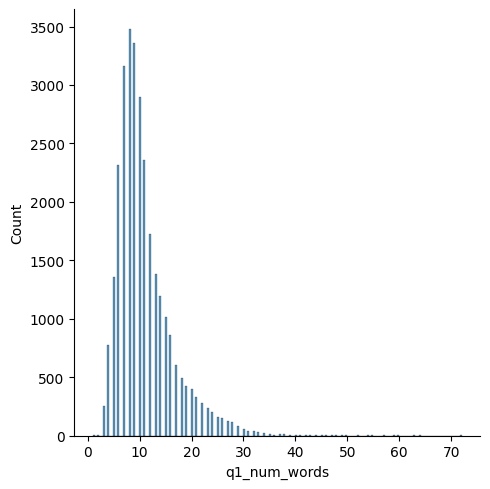

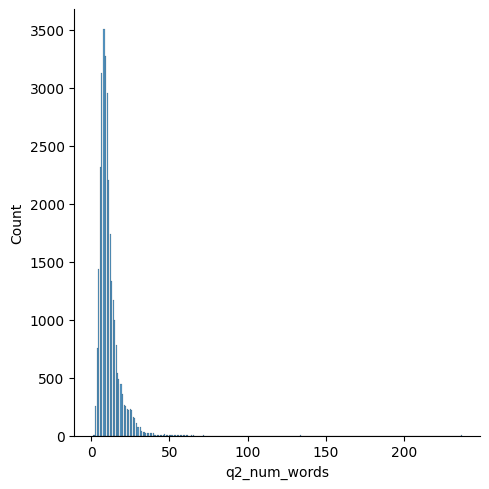

In [25]:
sns.displot(new_df["q1_num_words"])
sns.displot(new_df["q2_num_words"])
print("minimum words in q1:", new_df["q1_num_words"].min())
print("minimum words in q2:", new_df["q2_num_words"].min())
print("maximum words in q1:", new_df["q1_num_words"].max())
print("maximum words in q2:", new_df["q2_num_words"].max())
print("average words in q1:", new_df["q1_num_words"].mean())
print("average words in q2:", new_df["q2_num_words"].mean())

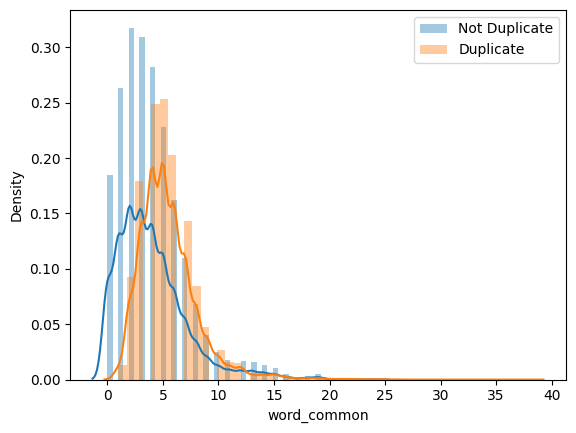

In [28]:
sns.distplot(
    new_df[new_df["is_duplicate"] == 0]["word_common"],
    label="Not Duplicate",
    kde=True
)

sns.distplot(
    new_df[new_df["is_duplicate"] == 1]["word_common"],
    label="Duplicate",
    kde=True
)

plt.legend()
plt.show()

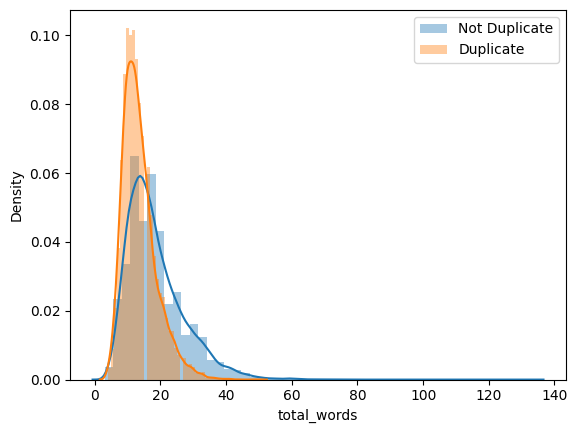

In [ ]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_words'], label='Not Duplicate', kde=True)
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_words'], label='Duplicate', kde=True)
plt.legend()
plt.show()

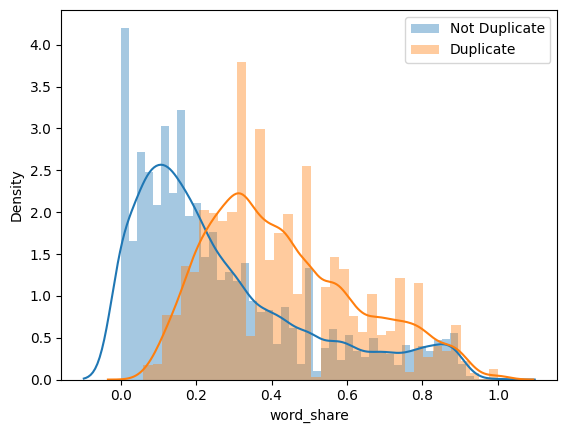

In [31]:
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'], label='Not Duplicate', kde=True)
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'], label='Duplicate', kde=True)
plt.legend()
plt.show()

apply BoW

In [43]:
ques_df = new_df[["question1", "question2"]]

final_df = new_df.drop(columns=["id","qid1","qid2","question1","question2"])

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=3000)

# Vectorize Q1
q1_arr = cv.fit_transform(ques_df["question1"]).toarray()

# Vectorize Q2 using SAME vocabulary
q2_arr = cv.transform(ques_df["question2"]).toarray()

# Create DF for each
temp_df1 = pd.DataFrame(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=ques_df.index)

# Merge horizontally
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

# Add to final_df
final_df = pd.concat([final_df, temp_df], axis=1)

print(final_df.shape)
final_df.head()


(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,13,0.85,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,16,0.44,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,32,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,10,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
final_df.columns = final_df.columns.astype(str)


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_df.iloc[:, 1:], final_df.iloc[:, 0], test_size=0.2, random_state=42)


In [48]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.771


In [50]:
print(X_train.dtypes)
print(X_train.applymap(type).head())


q1_len          int64
q2_len          int64
q1_num_words    int64
q2_num_words    int64
word_common     int64
                ...  
2995            int64
2996            int64
2997            int64
2998            int64
2999            int64
Length: 6007, dtype: object
               q1_len         q2_len   q1_num_words   q2_num_words  \
16886   <class 'int'>  <class 'int'>  <class 'int'>  <class 'int'>   
349845  <class 'int'>  <class 'int'>  <class 'int'>  <class 'int'>   
331239  <class 'int'>  <class 'int'>  <class 'int'>  <class 'int'>   
350540  <class 'int'>  <class 'int'>  <class 'int'>  <class 'int'>   
139497  <class 'int'>  <class 'int'>  <class 'int'>  <class 'int'>   

          word_common    total_words       word_share              0  \
16886   <class 'int'>  <class 'int'>  <class 'float'>  <class 'int'>   
349845  <class 'int'>  <class 'int'>  <class 'float'>  <class 'int'>   
331239  <class 'int'>  <class 'int'>  <class 'float'>  <class 'int'>   
350540  <class 'int'>

In [51]:
final_df = new_df.drop(columns=["id","qid1","qid2","question1","question2"])


In [52]:
cv = CountVectorizer(max_features=3000)

q1_arr = cv.fit_transform(new_df["question1"]).toarray()
q2_arr = cv.transform(new_df["question2"]).toarray()

temp_df1 = pd.DataFrame(q1_arr, index=new_df.index)
temp_df2 = pd.DataFrame(q2_arr, index=new_df.index)

temp_df = pd.concat([temp_df1, temp_df2], axis=1)


In [53]:
final_df = pd.concat([final_df, temp_df], axis=1)


In [54]:
final_df = final_df.select_dtypes(include=["number"])


In [55]:
final_df.columns = final_df.columns.astype(str)


In [56]:
X = final_df.drop(columns=["is_duplicate"])
y = final_df["is_duplicate"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [57]:
xgb = XGBClassifier()
xgb.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = xgb.predict(X_test.to_numpy())


In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss"
)

xgb.fit(X_train.to_numpy(), y_train.to_numpy())

# ---------------------------
# 4. PREDICT & ACCURACY
# ---------------------------

y_pred = xgb.predict(X_test.to_numpy())
accuracy = accuracy_score(y_test, y_pred)

print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.7695


: 